In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib retina-face opencv-python-headless


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
!pip install retina-face
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import os
import cv2
from retinaface import RetinaFace
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import tensorflow as tf

# Set GPU memory limit
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=10240)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
base_path = '/content/drive/My Drive/dataset'  # Replace with your actual folder path
output_parent_folder = '/content/drive/MyDrive/dataset_cropped2'
liked_folder = os.path.join(base_path, 'Like')
unliked_folder = os.path.join(base_path, 'Unlike')
liked_cropped_folder = os.path.join(output_parent_folder, 'liked_cropped')
unliked_cropped_folder = os.path.join(output_parent_folder, 'unliked_cropped')

os.makedirs(liked_cropped_folder, exist_ok=True)
os.makedirs(unliked_cropped_folder, exist_ok=True)

# Step 3: Install RetinaFace and OpenCV


# Step 4: Convert image to a supported format (if needed)
def convert_image(image_path, output_format='jpg'):
    img = Image.open(image_path).convert('RGB')
    output_path = f"{os.path.splitext(image_path)[0]}.{output_format}"
    img.save(output_path)
    return output_path

# Step 5: Detect and crop faces using RetinaFace
def detect_and_crop_faces(image_path, save_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return

    results = RetinaFace.detect_faces(image_path)

    for i, (key, face) in enumerate(results.items()):
        facial_area = face['facial_area']
        x, y, width, height = facial_area[0], facial_area[1], facial_area[2] - facial_area[0], facial_area[3] - facial_area[1]
        x, y = abs(x), abs(y)
        face_crop = image[y:y+height, x:x+width]
        face_crop = cv2.resize(face_crop, (224, 224))  # Resize to 224x224 for ResNet50

        # Ensure the cropped face is not too small
        if face_crop.shape[0] < 20 or face_crop.shape[1] < 20:
            print(f"Skipped {image_path} due to too small face region.")
            continue

        face_filename = os.path.join(save_path, f'{os.path.splitext(os.path.basename(image_path))[0]}_face_{i}.jpg')
        cv2.imwrite(face_filename, face_crop)

# Step 6: Process images in a folder
def process_folder(input_folder, output_folder):
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('png', 'jpg', 'jpeg', 'webp', 'avif', 'bmp', 'tiff', 'gif', 'jfif')):
            img_path = os.path.join(input_folder, filename)
            if filename.lower().endswith(('webp', 'avif', 'bmp', 'tiff', 'gif', 'jfif')):
                img_path = convert_image(img_path)
            detect_and_crop_faces(img_path, output_folder)

# Process images in the liked and unliked folders
process_folder(liked_folder, liked_cropped_folder)
process_folder(unliked_folder, unliked_cropped_folder)

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/dataset_cropped2'

In [ ]:
os.listdir(data_dir)

['liked_cropped', 'unliked_cropped']

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dataset_cropped2',batch_size=16, image_size=(224,224)) #building datasets on the fly (builds classes, labels etc.)

Found 2135 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
len(batch)

2

In [ ]:
batch[0].shape

(16, 224, 224, 3)

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator=data.as_numpy_iterator()

In [ ]:
batch=scaled_iterator.next()

In [ ]:
batch[1]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int32)

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.47843137, 0.48235294, 0.4627451 ],
          [0.4627451 , 0.46666667, 0.44705883],
          [0.4745098 , 0.47058824, 0.4509804 ],
          ...,
          [0.5137255 , 0.49019608, 0.49803922],
          [0.49411765, 0.47058824, 0.47058824],
          [0.49019608, 0.46666667, 0.46666667]],
 
         [[0.37254903, 0.36862746, 0.3529412 ],
          [0.34901962, 0.34509805, 0.3254902 ],
          [0.33333334, 0.32941177, 0.30980393],
          ...,
          [0.44313726, 0.41960785, 0.42745098],
          [0.4745098 , 0.4509804 , 0.4509804 ],
          [0.5137255 , 0.49019608, 0.49019608]],
 
         [[0.34117648, 0.32941177, 0.30980393],
          [0.30588236, 0.29411766, 0.26666668],
          [0.2627451 , 0.2509804 , 0.22352941],
          ...,
          [0.3372549 , 0.3137255 , 0.32156864],
          [0.42745098, 0.40392157, 0.4117647 ],
          [0.49411765, 0.47058824, 0.47843137]],
 
         ...,
 
         [[0.81960785, 0.83137256, 0.8980392 ],
          [0.75686

In [ ]:
batch[0].max()

1.0

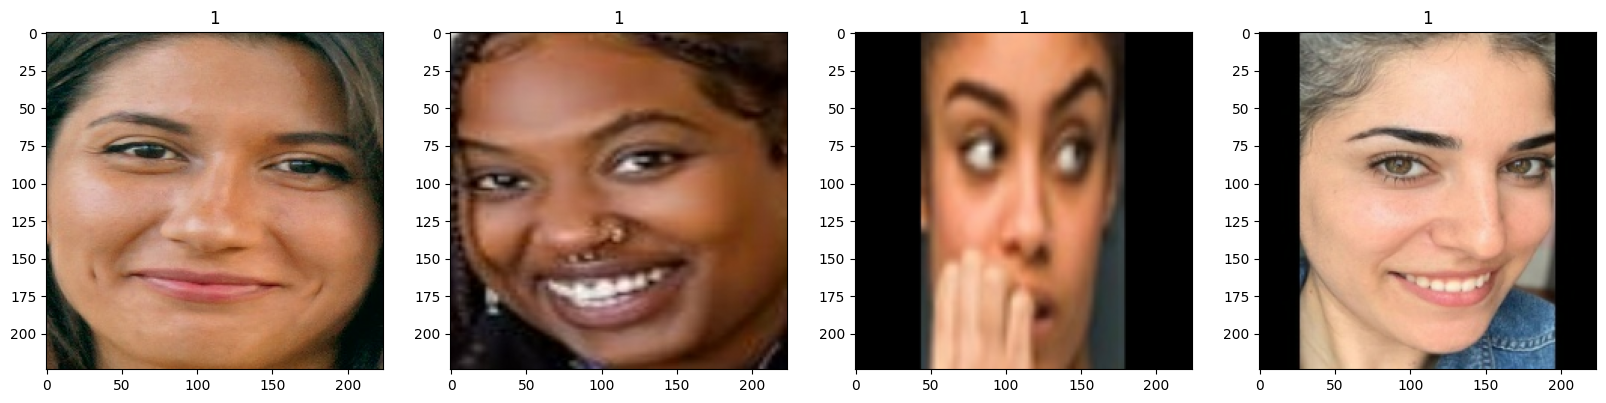

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
#CLASS 0 mapped to liked images
#CLASS 1 mapped to unliked images

In [ ]:
len(data)

134

In [ ]:
train_size = int(0.7 * len(data))+1
val_size = int(0.2 * len(data))+1
test_size = int(0.1 * len(data))

In [ ]:
test_size+train_size+val_size

134

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:


def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    image = tf.image.random_saturation(image, lower=0.9, upper=1.1)
    image = tf.image.random_hue(image, max_delta=0.1)
    return image, label


In [ ]:
train = train.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train = train.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val = val.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test = test.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Load the base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
base_model.trainable = False

# Unfreeze the first few initial layers
for layer in base_model.layers[:5]:  # Adjust the number according to your needs
    layer.trainable = True

# Unfreeze the last few layers
for layer in base_model.layers[-5:]:  # Adjust the number according to your needs
    layer.trainable = True

# Add custom layers on top of the base model with L2 regularization
x = base_model.output
x = Flatten()(x)
x = Dense(512, kernel_regularizer=l2(0.01))(x)
x = LeakyReLU(alpha=0.1)(x)  # Using Leaky ReLU with alpha 0.1
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
logdir = '/content/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 20))

history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback, lr_schedule])


Epoch 1/20
94/94 [==============================] - 39s 279ms/step - loss: 11.2904 - accuracy: 0.5160 - val_loss: 10.6342 - val_accuracy: 0.4699 - lr: 1.0000e-05
Epoch 2/20
94/94 [==============================] - 21s 222ms/step - loss: 10.7062 - accuracy: 0.5898 - val_loss: 10.4789 - val_accuracy: 0.4560 - lr: 1.1220e-05
Epoch 3/20
94/94 [==============================] - 22s 229ms/step - loss: 10.3390 - accuracy: 0.6303 - val_loss: 10.2614 - val_accuracy: 0.4769 - lr: 1.2589e-05
Epoch 4/20
94/94 [==============================] - 22s 233ms/step - loss: 10.0173 - accuracy: 0.6862 - val_loss: 10.0658 - val_accuracy: 0.4931 - lr: 1.4125e-05
Epoch 5/20
94/94 [==============================] - 22s 232ms/step - loss: 9.7516 - accuracy: 0.6875 - val_loss: 9.8554 - val_accuracy: 0.4977 - lr: 1.5849e-05
Epoch 6/20
94/94 [==============================] - 23s 236ms/step - loss: 9.4542 - accuracy: 0.7207 - val_loss: 9.8005 - val_accuracy: 0.4815 - lr: 1.7783e-05
Epoch 7/20
94/94 [==============

In [ ]:
# Fine-tune the model
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [ ]:
# Recompile the model for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_fine = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/100
94/94 [==============================] - 43s 224ms/step - loss: 4.7288 - accuracy: 0.7068 - val_loss: 4.7556 - val_accuracy: 0.6713
Epoch 2/100
94/94 [==============================] - 25s 259ms/step - loss: 4.3928 - accuracy: 0.7693 - val_loss: 4.5950 - val_accuracy: 0.6528
Epoch 3/100
94/94 [==============================] - 21s 220ms/step - loss: 4.2070 - accuracy: 0.8005 - val_loss: 4.5453 - val_accuracy: 0.6435
Epoch 4/100
94/94 [==============================] - 20s 212ms/step - loss: 4.0431 - accuracy: 0.8318 - val_loss: 4.4096 - val_accuracy: 0.6782
Epoch 5/100
94/94 [==============================] - 25s 258ms/step - loss: 3.8791 - accuracy: 0.8730 - val_loss: 4.2993 - val_accuracy: 0.6898
Epoch 6/100
94/94 [==============================] - 21s 219ms/step - loss: 3.7725 - accuracy: 0.8757 - val_loss: 4.2443 - val_accuracy: 0.6806
Epoch 7/100
94/94 [==============================] - 20s 210ms/step - loss: 3.6595 - accuracy: 0.8876 - val_loss: 4.2080 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(test)
print(f"Test Accuracy: {accuracy}")

13/13 [==============================] - 8s 139ms/step - loss: 2.5681 - accuracy: 0.6281
Test Accuracy: 0.6281406879425049


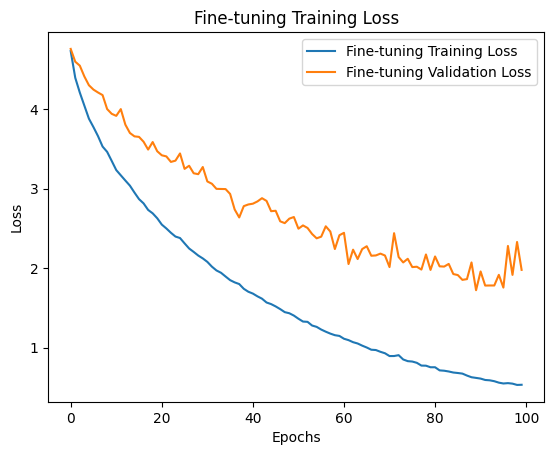

In [ ]:
# Plotting Fine-tuning Loss and Accuracy
plt.figure()
plt.plot(history_fine.history['loss'], label='Fine-tuning Training Loss')
plt.plot(history_fine.history['val_loss'], label='Fine-tuning Validation Loss')
plt.title('Fine-tuning Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

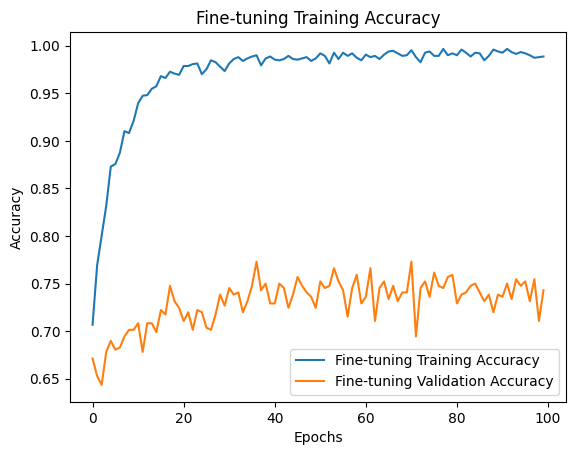

In [ ]:
plt.figure()
plt.plot(history_fine.history['accuracy'], label='Fine-tuning Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-tuning Validation Accuracy')
plt.title('Fine-tuning Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Precision: 0.7200000286102295, Recall: 0.7272727489471436, Accuracy: 0.7135416865348816

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test:
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')


1/1 [==============================] - 0s 36ms/step
Precision: 0.6330274939537048, Recall: 0.6634615659713745, Accuracy: 0.623115599155426
